# Youtube Search Term Exploration
#### By: Tim Santos 
<ztdsantos@globe.com.ph>
<timothyisrael.santos@thinkbiganalytics.com>

#### Background:
- Present to AMP and identify potential use case and interest
- To explore search term data and apply basic NLP techniques 
- To explore search term categorization

Accommpanying presentation: https://goo.gl/cbC57D

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVR
from sklearn import svm, metrics, linear_model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import io
import requests

### Load the CSV File of AMP-Labelled Data  to Pandas Dataframe

In [2]:
adata=pd.read_csv('/data/raw_data/zted0040/amp_data.csv')

In [3]:
adata.head()

,searchTerm,videoID,categoryID,category
0,jeremi planez,--5u48IaR4M,10.0,Music
1,kundiman cho,--B791t__ok,22.0,People_and_Blogs
2,art garfunkel the sound of silence,--DbgPXwLlM,10.0,Music
3,sowmoy,--GmYWoFyJ4,23.0,Comedy
4,20r,--XVqynW3-M,22.0,People_and_Blogs


### Load the CSV File of AMP-Labelled Data  to Pandas Dataframe

In [4]:
summary_data=pd.read_csv('/data/raw_data/zted0040/summary.csv')

In [5]:
summary_data.head()

,cluster_id,count
0,Adult,374
1,Autos_and_Vehicles,141
2,Comedy,427
3,Education,786
4,Entertainment,3775


### Display the search term categories defined by AMP

In [6]:
for cat in summary_data.cluster_id:
    print(cat)

Adult
Autos_and_Vehicles
Comedy
Education
Entertainment
Film_and_Animation
Gaming
Howto_and_Style
Movies
Music
News_and_Politics
No_Category_Found
Nonprofits_and_Activism
People_and_Blogs
Pets_and_Animals
Science_and_Technology
Shows
Sports
Trailers
Travel_and_Events


## Processing and Feature Extraction

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Do some processing here

- cleaning
- parsing
- stemming
- lemmatization
- POS-tagging
- chunking
- sentenizer

In [8]:
adata_parsed = adata 

In [9]:
# Some basic parsing (removed known html tags for youtube)
adata_parsed.searchTerm=adata_parsed.searchTerm.str.replace('gl', '').str.replace('en', '').str.replace('hl', '')
# adata_parsed=adata_parsed.searchTerm.dropna()

In [10]:
adata_parsed.head()

,searchTerm,videoID,categoryID,category
0,jeremi planez,--5u48IaR4M,10.0,Music
1,kundiman cho,--B791t__ok,22.0,People_and_Blogs
2,art garfunkel the sound of silce,--DbgPXwLlM,10.0,Music
3,sowmoy,--GmYWoFyJ4,23.0,Comedy
4,20r,--XVqynW3-M,22.0,People_and_Blogs


In [11]:
sc.appName

u'pyspark-shell'

In [12]:
from pyspark import SparkContext, SparkConf
from pyspark.mllib.feature import HashingTF, IDF

In [13]:
from pyspark.sql import DataFrameReader

In [14]:
df = spark.read.csv(path='/data/raw_data/zted0040/amp_data.csv',header=True)

In [15]:
df.take(10)

[Row(searchTerm=u'jeremi planez', videoID=u'--5u48IaR4M', categoryID=u'10', category=u'Music'),
 Row(searchTerm=u'kundiman cho', videoID=u'--B791t__ok', categoryID=u'22', category=u'People_and_Blogs'),
 Row(searchTerm=u'art garfunkel the sound of silence', videoID=u'--DbgPXwLlM', categoryID=u'10', category=u'Music'),
 Row(searchTerm=u'sowmoy', videoID=u'--GmYWoFyJ4', categoryID=u'23', category=u'Comedy'),
 Row(searchTerm=u'20r', videoID=u'--XVqynW3-M', categoryID=u'22', category=u'People_and_Blogs'),
 Row(searchTerm=u'twice live sm 1', videoID=u'--vtX3bWuOI', categoryID=u'24', category=u'Entertainment'),
 Row(searchTerm=u'bigbang last dance', videoID=u'--zku6TB5NY', categoryID=u'10', category=u'Music'),
 Row(searchTerm=u'last danc', videoID=u'--zku6TB5NY', categoryID=u'10', category=u'Music'),
 Row(searchTerm=u'bigbang last', videoID=u'--zku6TB5NY', categoryID=u'10', category=u'Music'),
 Row(searchTerm=u'kumapit ka lang guitar chord', videoID=u'-0A6MWgnhzY', categoryID=u'10', category=

#### Standardize the categories

In [16]:
# cvModel = cv.fit(training_df)
sqlContext.registerDataFrameAsTable(df, "myTable")
df2 = sqlContext.sql("SELECT searchTerm, videoID, CASE WHEN cast(categoryID AS INT) = 10 then 1 else 0 END AS label, category from  myTable")
splits = df2.randomSplit([0.7, 0.3])
training_df = splits[0]
test_df = splits[1]
df2.show()

+--------------------+-----------+-----+------------------+
|          searchTerm|    videoID|label|          category|
+--------------------+-----------+-----+------------------+
|       jeremi planez|--5u48IaR4M|    1|             Music|
|        kundiman cho|--B791t__ok|    0|  People_and_Blogs|
|art garfunkel the...|--DbgPXwLlM|    1|             Music|
|              sowmoy|--GmYWoFyJ4|    0|            Comedy|
|                 20r|--XVqynW3-M|    0|  People_and_Blogs|
|     twice live sm 1|--vtX3bWuOI|    0|     Entertainment|
|  bigbang last dance|--zku6TB5NY|    1|             Music|
|           last danc|--zku6TB5NY|    1|             Music|
|        bigbang last|--zku6TB5NY|    1|             Music|
|kumapit ka lang g...|-0A6MWgnhzY|    1|             Music|
|        dangerous be|-0A9CzPNVhs|    1|             Music|
|    song song couple|-0WqCYaard8|    0|  People_and_Blogs|
|the best of super...|-0grb6kztWM|    0|Autos_and_Vehicles|
|          google.com|-0h16IzMJpM|    0|

In [17]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml import Pipeline
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator

# Configure an ML pipeline, which consists of tree stages: tokenizer, hashingTF, and nb.
tokenizer = Tokenizer(inputCol="searchTerm", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
idf = IDF(minDocFreq=3, inputCol="features", outputCol="idf")
nb = NaiveBayes()
pipeline = Pipeline(stages=[tokenizer, hashingTF, idf, nb])

paramGrid = ParamGridBuilder().addGrid(nb.smoothing, [0.0, 1.0]).build()

modeler=MulticlassClassificationEvaluator(labelCol="label")

cv = CrossValidator(estimator=pipeline, 
                    estimatorParamMaps=paramGrid, 
                    evaluator=modeler, 
                    numFolds=4)

cvModel=cv.fit(training_df)

In [18]:
result = cvModel.transform(test_df)
prediction_df = result.select("searchTerm", "label", "prediction")

In [19]:
prediction_df.take(3)

[Row(searchTerm=u'- pare ko - eraserheads', label=1, prediction=1.0),
 Row(searchTerm=u'0000vv', label=0, prediction=1.0),
 Row(searchTerm=u'018 lean rymes how do', label=0, prediction=1.0)]

In [20]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol="label")
# evaluator.evaluate(result, {evaluator.metricName: "precision"})

In [21]:
evaluator.evaluate(result, {evaluator.metricName: "weightedPrecision"})

0.7452900633386959

In [22]:
evaluator.evaluate(result, {evaluator.metricName: "weightedRecall"})

0.7246420047732697

In [23]:
evaluator.evaluate(result, {evaluator.metricName: "f1"})

0.7174294037952889

In [24]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml import Pipeline
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator

prec=[]
rec=[]
f1measure=[]
for i in range(len(summary_data.cluster_id)):

    # Configure an ML pipeline, which consists of tree stages: tokenizer, hashingTF, and nb.
    tokenizer = Tokenizer(inputCol="searchTerm", outputCol="words")
    hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
    idf = IDF(minDocFreq=3, inputCol="features", outputCol="idf")
    nb = NaiveBayes()
    pipeline = Pipeline(stages=[tokenizer, hashingTF, idf, nb])


    paramGrid = ParamGridBuilder().addGrid(nb.smoothing, [0.0, 1.0]).build()

    modeler=MulticlassClassificationEvaluator(labelCol="categoryID")

    cv = CrossValidator(estimator=pipeline, 
                        estimatorParamMaps=paramGrid, 
                        evaluator=modeler, 
                        numFolds=4)
    #     i = 9
    # cvModel = cv.fit(training_df)
    sqlContext.registerDataFrameAsTable(df, "myTable")
    #     query = "SELECT count from mytable WHERE id='{}'".format(id)
    df2 = sqlContext.sql("SELECT searchTerm, videoID, CASE WHEN cast(categoryID AS INT) = {} then 1 else 0 END AS label, category from  myTable".format(i))
    print("SELECT searchTerm, videoID, CASE WHEN cast(categoryID AS INT) = {} then 1 else 0 END AS label, category from  myTable".format(i))
    splits = df2.randomSplit([0.8, 0.2])
    training_df = splits[0]
    test_df = splits[1]
    df2.show()

    result = cvModel.transform(test_df)
    prediction_df = result.select("searchTerm", "label", "prediction")

#     evaluator.evaluate(result, {evaluator.metricName: "weightedPrecision"})

#     evaluator.evaluate(result, {evaluator.metricName: "weightedRecall"})

#     evaluator.evaluate(result, {evaluator.metricName: "f1"})
    prec.append(evaluator.evaluate(result, {evaluator.metricName: "weightedPrecision"}))
    rec.append(evaluator.evaluate(result, {evaluator.metricName: "weightedRecall"}))
    f1measure.append(evaluator.evaluate(result, {evaluator.metricName: "f1"}))



SELECT searchTerm, videoID, CASE WHEN cast(categoryID AS INT) = 0 then 1 else 0 END AS label, category from  myTable
+--------------------+-----------+-----+------------------+
|          searchTerm|    videoID|label|          category|
+--------------------+-----------+-----+------------------+
|       jeremi planez|--5u48IaR4M|    0|             Music|
|        kundiman cho|--B791t__ok|    0|  People_and_Blogs|
|art garfunkel the...|--DbgPXwLlM|    0|             Music|
|              sowmoy|--GmYWoFyJ4|    0|            Comedy|
|                 20r|--XVqynW3-M|    0|  People_and_Blogs|
|     twice live sm 1|--vtX3bWuOI|    0|     Entertainment|
|  bigbang last dance|--zku6TB5NY|    0|             Music|
|           last danc|--zku6TB5NY|    0|             Music|
|        bigbang last|--zku6TB5NY|    0|             Music|
|kumapit ka lang g...|-0A6MWgnhzY|    0|             Music|
|        dangerous be|-0A9CzPNVhs|    0|             Music|
|    song song couple|-0WqCYaard8|    0|  P

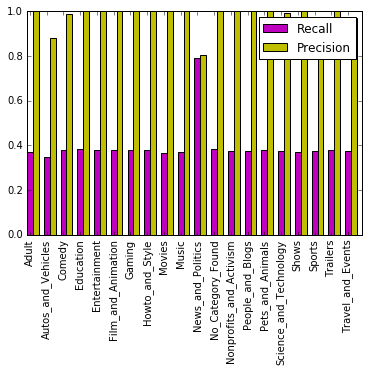

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

N = len(summary_data.cluster_id)
# men_means = (20, 35, 30, 35, 27)
# men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, rec, width, color='m')

rects2 = ax.bar(ind + width, prec, width, color='y')
# rects2 = ax.bar(ind + width, f1measure, width, color='y')
ax.set_xticks(ind + width / 2)


ax.set_xticklabels(summary_data.cluster_id,rotation='vertical')

ax.legend((rects1[0], rects2[0]), ('Recall', 'Precision'))


# def autolabel(rects):
#     """
#     Attach a text label above each bar displaying its height
#     """
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')
# rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

In [26]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml import Pipeline
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.classification import LinearSVC

prec=[]
rec=[]
f1measure=[]
for i in range(len(summary_data.cluster_id)):

    # Configure an ML pipeline, which consists of tree stages: tokenizer, hashingTF, and nb.
    tokenizer = Tokenizer(inputCol="searchTerm", outputCol="words")
    hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
    idf = IDF(minDocFreq=3, inputCol="features", outputCol="idf")
    nb = NaiveBayes()
    #     mlp = MultilayerPerceptronClassifier(maxIter=100, layers=[2, 2, 2], blockSize=1, seed=123)
    #     lsvc = LinearSVC(maxIter=10, regParam=0.1)
    lsvc = LinearSVC(maxIter=10)
    paramGrid = ParamGridBuilder().addGrid(lsvc.regParam, [0.1]).build()

    pipeline = Pipeline(stages=[tokenizer, hashingTF, idf, lsvc])


    #     paramGrid = ParamGridBuilder().addGrid(nb.smoothing, [0.0, 1.0]).build()

    modeler=MulticlassClassificationEvaluator(labelCol="categoryID")

    cv = CrossValidator(estimator=pipeline, 
                        estimatorParamMaps=paramGrid, 
                        evaluator=modeler, 
                        numFolds=4)
    #     i = 9
    # cvModel = cv.fit(training_df)
    sqlContext.registerDataFrameAsTable(df, "myTable")
    #     query = "SELECT count from mytable WHERE id='{}'".format(id)
    df2 = sqlContext.sql("SELECT searchTerm, videoID, CASE WHEN cast(categoryID AS INT) = {} then 1 else 0 END AS label, category from  myTable".format(i))
    print("SELECT searchTerm, videoID, CASE WHEN cast(categoryID AS INT) = {} then 1 else 0 END AS label, category from  myTable".format(i))
    splits = df2.randomSplit([0.8, 0.2])
    training_df = splits[0]
    test_df = splits[1]
    df2.show()

    result = cvModel.transform(test_df)
    prediction_df = result.select("searchTerm", "label", "prediction")

    #     evaluator.evaluate(result, {evaluator.metricName: "weightedPrecision"})

    #     evaluator.evaluate(result, {evaluator.metricName: "weightedRecall"})

    #     evaluator.evaluate(result, {evaluator.metricName: "f1"})
    prec.append(evaluator.evaluate(result, {evaluator.metricName: "weightedPrecision"}))
    rec.append(evaluator.evaluate(result, {evaluator.metricName: "weightedRecall"}))
    f1measure.append(evaluator.evaluate(result, {evaluator.metricName: "f1"}))

SELECT searchTerm, videoID, CASE WHEN cast(categoryID AS INT) = 0 then 1 else 0 END AS label, category from  myTable
+--------------------+-----------+-----+------------------+
|          searchTerm|    videoID|label|          category|
+--------------------+-----------+-----+------------------+
|       jeremi planez|--5u48IaR4M|    0|             Music|
|        kundiman cho|--B791t__ok|    0|  People_and_Blogs|
|art garfunkel the...|--DbgPXwLlM|    0|             Music|
|              sowmoy|--GmYWoFyJ4|    0|            Comedy|
|                 20r|--XVqynW3-M|    0|  People_and_Blogs|
|     twice live sm 1|--vtX3bWuOI|    0|     Entertainment|
|  bigbang last dance|--zku6TB5NY|    0|             Music|
|           last danc|--zku6TB5NY|    0|             Music|
|        bigbang last|--zku6TB5NY|    0|             Music|
|kumapit ka lang g...|-0A6MWgnhzY|    0|             Music|
|        dangerous be|-0A9CzPNVhs|    0|             Music|
|    song song couple|-0WqCYaard8|    0|  P

In [27]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml import Pipeline
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Configure an ML pipeline, which consists of tree stages: tokenizer, hashingTF, and nb.
tokenizer = Tokenizer(inputCol="searchTerm", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
idf = IDF(minDocFreq=3, inputCol="features", outputCol="idf")
# mlp = MultilayerPerceptronClassifier(maxIter=100, layers=[2, 2, 1], blockSize=1, seed=123)
lsvc = LinearSVC(maxIter=10)

pipeline = Pipeline(stages=[tokenizer, hashingTF, idf, lsvc])


paramGrid = ParamGridBuilder().addGrid(lsvc.regParam, [0.7,0.1,0.01]).build()

modeler=MulticlassClassificationEvaluator(labelCol="label")

cv = CrossValidator(estimator=pipeline, 
                    estimatorParamMaps=paramGrid, 
                    evaluator=modeler, 
                    numFolds=4)

cvModel=cv.fit(training_df)

result = cvModel.transform(test_df)
prediction_df = result.select("searchTerm", "label", "prediction")

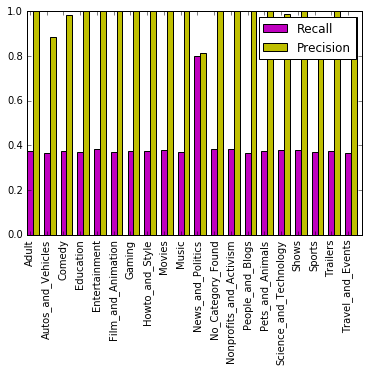

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

N = len(summary_data.cluster_id)
# men_means = (20, 35, 30, 35, 27)
# men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, rec, width, color='m')

rects2 = ax.bar(ind + width, prec, width, color='y')
# rects2 = ax.bar(ind + width, f1measure, width, color='y')
ax.set_xticks(ind + width / 2)


ax.set_xticklabels(summary_data.cluster_id,rotation='vertical')

ax.legend((rects1[0], rects2[0]), ('Recall', 'Precision'))


# def autolabel(rects):
#     """
#     Attach a text label above each bar displaying its height
#     """
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')
# rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

In [29]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol="label")
print(evaluator.evaluate(result, {evaluator.metricName: "weightedPrecision"}))
print(evaluator.evaluate(result, {evaluator.metricName: "weightedRecall"}))
print(evaluator.evaluate(result, {evaluator.metricName: "f1"}))

0.994222942646
0.99493066945
0.994284556514
